In [7]:
import pickle
import gzip

PATH = Path('/Users/seeni-2328/Documents/Seeni/Datasets/global-datasets/MNIST')
FILENAME = 'mnist.pkl.gz'
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

torch.Size([50000, 784])
torch.Size([784])
50000 50000 10000 10000


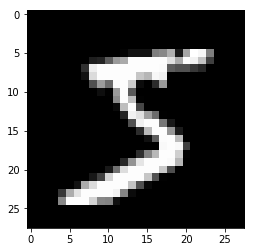

In [52]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)
print(x_train[0].shape)
# print(y_train.shape)
print(len(x_train), len(y_train), len(x_valid), len(y_valid))

In [45]:
import torch
x_train, y_train, x_valid, y_valid = map(
        torch.tensor, (x_train, y_train, x_valid, y_valid)
)

In [50]:
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())
print(x_train.min(), x_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)
tensor(0.) tensor(0.9961)


In [54]:
import math
math.sqrt(784)

28.0

In [61]:
weights = torch.randn(784, 10)
print(weights.shape)
weights[0]

torch.Size([784, 10])


tensor([ 0.2987,  0.3940,  0.1616, -0.5811,  0.4705,  0.5785,  0.1247,  1.4993,
         1.8364,  0.3648])

In [62]:
weights = weights / math.sqrt(784)
print(weights.shape)
weights[0]

torch.Size([784, 10])


tensor([ 0.0107,  0.0141,  0.0058, -0.0208,  0.0168,  0.0207,  0.0045,  0.0535,
         0.0656,  0.0130])

In [63]:
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [215]:
def log_softmax(x):
    exp = x.exp()
    den = exp.sum(-1).unsqueeze(-1)
#     print('x[0]:',x[0])
#     print('exp:',exp[0])
#     print(den[0], den.shape)
    final = exp / den
#     print('final:',final[0], final[0].sum())
    final = final.log()
#     print('final1:',final[0], final[0].sum())
#     return 
    return final
#     return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    res = xb @ weights + bias
    softmax = log_softmax(res)
#     print('res',res[0])
#     print('softmax',softmax[0])
    return softmax

In [235]:
bs = 64  #batch size
xb = x_train[0:bs]
print(xb.shape)  #(64, 784)
preds = model(xb)
print(preds.shape)
print(preds[0])

torch.Size([64, 784])
torch.Size([64, 10])
tensor([ 1.4387, -5.4680, -0.0742,  6.4893, -6.5402,  8.5122, -3.1934,  1.6239,
         0.0788, -1.0409], grad_fn=<SelectBackward>)


In [217]:
def nll(input, target):
#     print('predicted shape:', input.shape, input[0])
#     print('actual shape:', target.shape, target[0])
#     print(range(target.shape[0]))
#     print([range(target.shape[0]), target])
#     print(-input[range(target.shape[0]), target])
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [224]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(0.2248, grad_fn=<NegBackward>)


In [219]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    print(preds)
    print(yb)
    return (preds == yb).float().mean()

In [220]:
print(accuracy(preds, yb))

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 7, 7, 3, 8, 6, 7, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        5, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])
tensor(0.9531)


In [238]:
from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [239]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor([9, 3, 7, 0, 9, 0, 8, 5, 5, 2, 4, 5, 0, 8, 4, 8])
tensor([9, 3, 7, 0, 9, 0, 8, 5, 5, 2, 4, 5, 0, 8, 4, 8])
tensor(0.0601, grad_fn=<NllLossBackward>) tensor(1.)


In [240]:
import torch.nn.functional as F

loss_fun = F.cross_entropy

def model(xb) :
    return xb @ weights + bias

In [241]:
print(loss_fun(model(xb), yb))
print('Accuracy..')
print(accuracy(model(xb), yb))

tensor(0.0601, grad_fn=<NllLossBackward>)
Accuracy..
tensor([9, 3, 7, 0, 9, 0, 8, 5, 5, 2, 4, 5, 0, 8, 4, 8])
tensor([9, 3, 7, 0, 9, 0, 8, 5, 5, 2, 4, 5, 0, 8, 4, 8])
tensor(1.)
